Covariance Matrix:
 [[0.59682331 0.27559211]
 [0.27559211 0.60490602]]
Eigenvalues: [0.32524293 0.8764864 ]
Eigenvectors:
 [[-0.71227196 -0.7019036 ]
 [ 0.7019036  -0.71227196]]


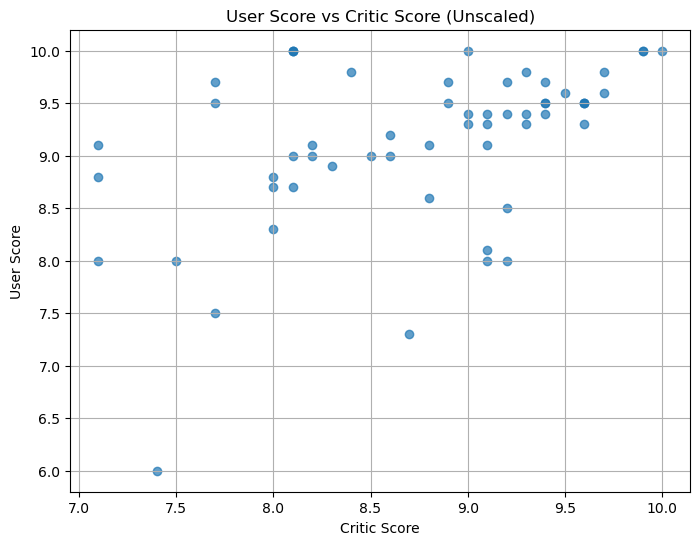

Explained Variance Ratio: [0.72933479 0.27066521]
PCA Components:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


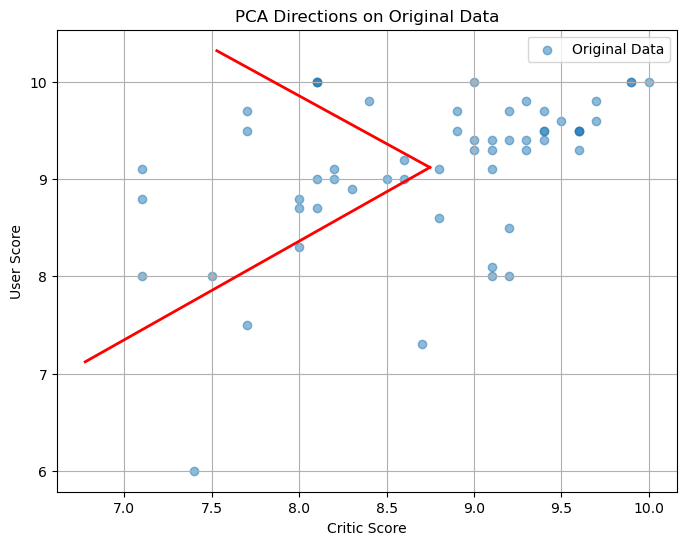

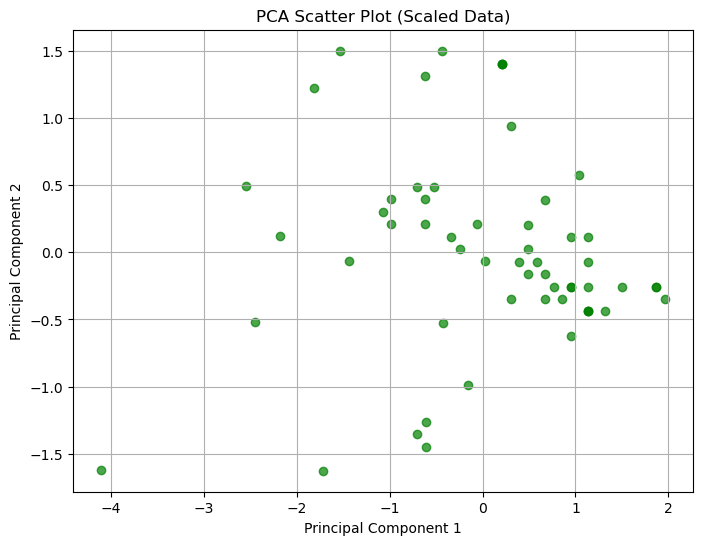

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PCA doesn't always require scaling, but we'll do both: unscaled and scaled
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("homeworh8.csv")

# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Use only critic_score and user_score, and drop any rows with missing values
scores = df[['critic_score', 'user_score']].dropna()

# =======================
# PART 1: Raw Data PCA (no scaling)
# =======================

# Calculate the covariance matrix
cov_matrix = np.cov(scores.T)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print covariance matrix, eigenvalues, and eigenvectors
print("Covariance Matrix:\n", cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Scatter plot of original data
plt.figure(figsize=(8, 6))
plt.scatter(scores['critic_score'], scores['user_score'], alpha=0.7)
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.title("User Score vs Critic Score (Unscaled)")
plt.grid(True)
plt.show()

# =======================
# PART 2: PCA with Scaling
# =======================

# Standardize the features
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(scores)

# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(scaled_scores)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Components:\n", pca.components_)

# Mean values for original data (used in some visualizations)
mean_vals = scores.mean()

# ✅ FIXED: Use iloc to avoid FutureWarning
mean_x, mean_y = mean_vals.iloc[0], mean_vals.iloc[1]

# Plot the PCA directions on the original data
plt.figure(figsize=(8, 6))
plt.scatter(scores['critic_score'], scores['user_score'], alpha=0.5, label="Original Data")
for length, vector in zip(eigenvalues, eigenvectors.T):
    v = vector * 3 * np.sqrt(length)
    plt.plot([mean_x, mean_x + v[0]], [mean_y, mean_y + v[1]], color='red', linewidth=2)

plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.title("PCA Directions on Original Data")
plt.legend()
plt.grid(True)
plt.show()

# =======================
# PART 3: PCA Scatter on Scaled Data
# =======================

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, color='green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (Scaled Data)")
plt.grid(True)
plt.show()
